# TRANSFORMADA DE HOUGH
**Aluno:** Luiz Eduardo Pita M. Almeida

**RA:** l229078

**Disciplina:** Processamento Digital de Imagens (P_IA898A_2018S2)

**Professora:** Letícia Rittner

A Transformada de Hough (TH) é uma técnica de reconhecimento de formas geométricas facilmente parametrizadas como 
linhas, círculos, elipses e parábolas.

Consiste de uma transformação espacial da imagem para um espaço chamado espaço de parâmetros ou espaço de Hough. Nesse novo espaço pontos colineares ou pontos pertecentes a uma determinada forma geométrica no plano da
imagem podem ser mapeados em construções geométricas que se intercedem no espaço da transformada (espaço de parâmetros).

No modo atual da TH sugerido por Duda e Hart em 1972 temos a seguinte parametrização para a detecção de retas é dada pela equação normal da reta:

$$
\rho = x_{i}cos(\theta) + y_{i}sen(\theta)
$$

Onde $\rho$ é a menor distancia da reta a origem do plano e $\theta$ é o ângulo com a reta normal, conforme Figura[1]:
![Figura[1]: Equação Normal da Reta](https://2.bp.blogspot.com/-Q8WMArPROd0/UI8olgaybVI/AAAAAAAAAKs/U0T_kkVIK8A/s320/Nueva+imagen+%2876%29.bmp)

$x_{i}$ e $y_{i}$ são os pontos pertencentes a reta. Para essa transformada temos que para cada ponto $(x,y)$ da imagem será cálculado o valor de $\rho$ para uma faixa de valores de $\theta$. O resultado disso é uma curva senoidal no plano de eixos $\rho$ por $\theta$, esse plano é o espaço de parâmetros. 

Assim cada ponto da imagem terá associado a si uma curva senoidal no plano de parâmetros. Pontos colineares vão possuir um par $\theta$ e $\rho$ comum, isto é, uma reta no espaço da imagem torna-se um ponto $(\theta,\rho)$ no espaço de parâmetros.

Desse modo, implementa-se uma matriz de acumulação que conta a ocorrência de pontos comuns. Os pontos no plano dos parâmetros com maior valor nessa contagem (chamamos de maior número de votos) são possíveis retas no plano da imagem.  

Essa ideia se expandiu para outras formas geométricas de fácil parametrização, como círculos, elipses e parábolas. No caso dos círculos ou circunferências, por exemplo, temos que dada sua equação por:

$$
(x_{i} - a)^2 + (y_{i} - b)^2 = c
$$

O plano de parâmetros consite no plano tridimensional $(a,b,c)$ e as curvas formadas nesse plano para cada ponto da imagem são cones. Os círculos na imagem serão dados pelos pontos com maior número de votos na matriz de acumulação.

Esse notebook pretende mostrar a aplicações simples da Transformada de Hough e dividi-se em três partes:
- Transformações de Retas para o espaço de Hough
- Aplicação da TH para retas com uso do OpenCV
- Aplicação da TH para círculos com uso do OpenCV

In [4]:
# Importações de bibliotecas comuns para os três exercícios
import numpy as np
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline
# importação das bibliotecas do OpenCV
import cv2

## Exercício 1: Conversão de Retas para o espaço de Hough
Será construída uma função que realiza a parametrização dos pontos da imagem e construi a matriz de acumulação de votos, isto é, de soma dos pontos $(\theta,\rho)$ em comum.

A transformada de Hough atua sobre imagens de valores binários e uma optimização feita é trabalha somente com os contornos das regiões. Isso reduz o número de pontos a serem parametrizados, reduzindo o custo computacional da transformada. As formas geométricas vão permanecer na imagem apresentando somente seu contorno.

In [5]:

def toHoughSpace(img):
    # rho = x*cos(theta) + y*sen(theta)
    
    # Definição das faixas de Rho e de Theta
    thetas = np.deg2rad(np.arange(0.0, 180.0)) # os ângulos theta vão de 0 a 180 com resolução de 1 grau
    width, height = img.shape
    diag_len = int(np.ceil(np.sqrt(width**2 + height**2)))  # maior distancia (diagonal principal)
    rhos = np.linspace(-diag_len, diag_len,2*diag_len) #rho foi inicializado com o dobro do tamanho da diagonal principal

    # Cálculo dos senos e cosenos de theta
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Inicialização do acumulador de Hough
    accumulator = np.zeros([2*diag_len,num_thetas],dtype = 'float') # O acumulador representará o espaço de Hough e possui o tamanho do vetor de rhos X o tamanho do vetor de Thetas 
    y_idxs, x_idxs = np.nonzero(img)  # (row, col) índices das bordas

    # Parametrização e Cálculo dos votos 
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]
        for t_idx in range(num_thetas):
            # Cálculo de rho. Afim de eliminar pontos negativos o comprimento da diagonal foi adicionado
            rho = int(round(x * cos_t[t_idx] + y * sin_t[t_idx])+(diag_len))
            accumulator[rho,t_idx] += 1 # incremento do acumulador no ponto (rho,theta), contagem dos votos 

    return accumulator, thetas, rhos


### Transformada de Hough para um único ponto

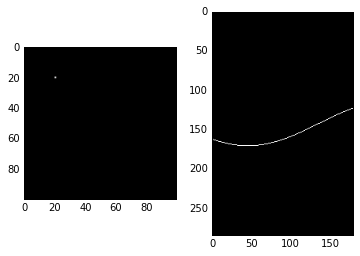

In [6]:
# cart representa o plano cartesiano, plano da imagem original
cart = np.zeros([100,100]) # inicialização de cart
cart[20,20] = 1 #o ponto (20,20) de cart representará nosso ponto na imagem

acc,theta,rho = toHoughSpace(cart)

plt.subplot(1,2,1)
plt.imshow(cart, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(acc,cmap='gray')

Como visto, pontos na imagem representam curvas senoidas no espaço de Hough.

### Transformada de Hough para dois pontos

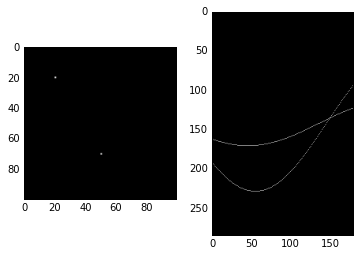

In [7]:
cart = np.zeros([100,100])
cart[20,20] = 1
cart[70,50] = 1

acc,theta,rho = toHoughSpace(cart)

plt.subplot(1,2,1)
plt.imshow(cart, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(acc,cmap='gray')

Como sabemos, para dois pontos dados existe uma reta que passa por eles. No plano de Hough, cada ponto forma uma curva senoidal e a possível reta que passa por eles é dada pelo ponto de interseção entre essas curvas, ou seja, essa reta é parametrizada pelo ponto $(rho,theta)$ interseção das curvas. 

A matriz de acumulação possuíra valor 2 (2 votos) nesse ponto.

(284, 180)
(135, 149) 2.0
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 2. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


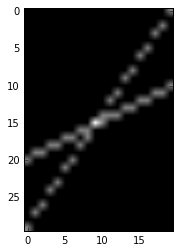

In [8]:
print acc.shape
print np.unravel_index(acc.argmax(), acc.shape), np.max(acc)
print acc[130:140,145:155]
plt.imshow(acc[120:150,140:160],cmap='gray')

### Transformada de Hough para três pontos

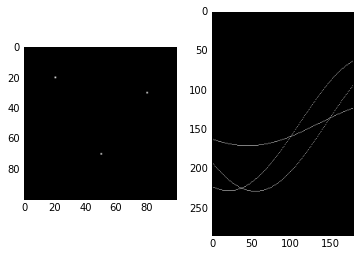

In [9]:
cart = np.zeros([100,100])
cart[20,20] = 1
cart[70,50] = 1
cart[30,80] = 1

acc,theta,rho = toHoughSpace(cart)

plt.subplot(1,2,1)
plt.imshow(cart, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(acc,cmap='gray')

Para dois pontos existirá uma reta que passa por eles. Entretanto, dados três pontos não colineares não existe nenhuma reta que passe pelos três. No espaço de Hough não existe interseção das três curvas, apenas delas duas a duas, indicando as três possíveis retas na imagem.

### Transformada de Hough para uma reta

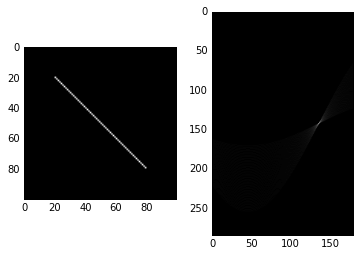

In [10]:
cart = np.zeros([100,100])
cart[20:80,20:80] = np.eye(60) # np.eye irá criar uma matriz identidade no espaço selecionada

acc,theta,rho = toHoughSpace(cart)

plt.subplot(1,2,1)
plt.imshow(cart, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(acc,cmap='gray')

Para n pontos colineares, exitirá um ponto $(\rho,\theta)$ interseção de todas as n curvas senoidais associadas a esses pontos. Nesse exemplo o maior valor da matriz de acumulação será 60.

(284, 180)
(142, 135) 60.0
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 11.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  5. 10.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 14. 10.]
 [ 0.  0.  0.  0.  0.  0.  0.  9. 13. 10.]
 [ 0.  0.  0.  0.  0.  0.  0. 20. 14. 10.]
 [ 0.  0.  0.  0.  0.  0. 19. 20. 13.  6.]
 [ 0.  0.  0.  0.  0.  0. 40. 11.  1.  0.]
 [ 0.  0.  0.  0.  1. 60.  1.  0.  0.  0.]
 [ 0.  0.  1. 11. 40.  0.  0.  0.  0.  0.]
 [ 1.  6. 13. 20. 19.  0.  0.  0.  0.  0.]
 [ 8. 10. 14. 20.  0.  0.  0.  0.  0.  0.]
 [ 8. 10. 13.  9.  0.  0.  0.  0.  0.  0.]
 [ 8. 10. 14.  0.  0.  0.  0.  0.  0.  0.]
 [ 8. 10.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 8. 11.  0.  0.  0.  0.  0.  0.  0.  0.]]


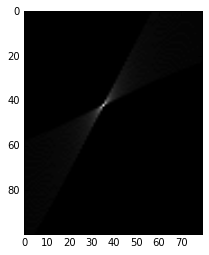

In [11]:
print acc.shape
print np.unravel_index(acc.argmax(), acc.shape), np.max(acc)
print acc[135:150,130:140]
plt.imshow(acc[100:200,100:200],cmap='gray')

### Transformada de Hough para mais de uma reta

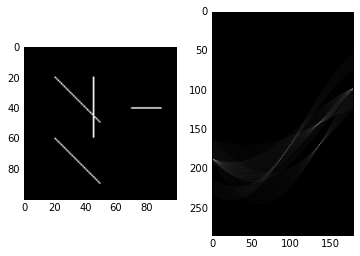

In [12]:
cart = np.zeros([100,100])
cart[20:50,20:50] = np.eye(30)
cart[60:90,20:50] = np.eye(30)
cart[20:60,45] = 1
cart[40,70:90] = 1

acc,theta,rho = toHoughSpace(cart)

plt.subplot(1,2,1)
plt.imshow(cart, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(acc,cmap='gray')

Na imagem do espaço da transformada de Hough observa-se a existência de 4 pontos bem destacados na imagem. Cada ponto desse é interseção de n curvas senoidais, onde n é o número de pontos da reta. A transformada de Hough deve possuir um valor de limiar (threshold) que me diz a partir de quantos votos esses pontos representam ou não uma reta. 

No exemplo acima a menor reta é formada por 30 pontos logo  vamos usar como valor de Threshold o valor 20 e plotar novamente a matriz de acumulação.

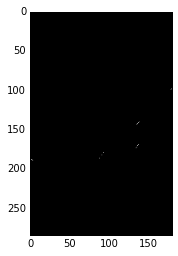

In [13]:
acc2 = (acc >= 20)*acc
plt.imshow(acc2,cmap='gray')

Aparentemente podemos enxergar quatro concentrações de pontos, que serão nossas possíveis retas na imagem. O código a seguir mostra a localização $(\rho,\theta)$ desses pontos.

In [14]:
acc3 = acc2.copy()
print np.unravel_index(acc3.argmax(), acc3.shape), np.max(acc3)
x,y = np.unravel_index(acc3.argmax(), acc3.shape)
acc3[x,y] = 0
print np.unravel_index(acc3.argmax(), acc3.shape), np.max(acc3)
x,y = np.unravel_index(acc3.argmax(), acc3.shape)
acc3[x,y] = 0
print np.unravel_index(acc3.argmax(), acc3.shape), np.max(acc3)
x,y = np.unravel_index(acc3.argmax(), acc3.shape)
acc3[x,y] = 0
print np.unravel_index(acc3.argmax(), acc3.shape), np.max(acc3)
x,y = np.unravel_index(acc3.argmax(), acc3.shape)
acc3[x,y] = 0
print np.unravel_index(acc3.argmax(), acc3.shape), np.max(acc3)
x,y = np.unravel_index(acc3.argmax(), acc3.shape)
acc3[x,y] = 0
print np.unravel_index(acc3.argmax(), acc3.shape), np.max(acc3)
x,y = np.unravel_index(acc3.argmax(), acc3.shape)
acc3[x,y] = 0

(187, 0) 41.0
(98, 179) 33.0
(188, 1) 31.0
(142, 135) 30.0
(169, 136) 30.0
(170, 135) 30.0


Conforme a Figura[1] um ponto pertencente a reta da imagem é o ponto (x0,y0) que pode ser calculado como:

$$
x = \rho*cos(\theta) \\
y = \rho*sen(\theta)
$$

Então, com esse ponto precisamos deslocar uma certa quantidade de pixels em x e y, mantendo a angulação da reta para obter outros dois pontos (x1,y1) e (x2,y2) onde (x0,y0) esteja entre eles. Utilizando esses pontos como ponto final e inicial podemos desenhar as retas detectadas.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fbc3b4db590>,
 <matplotlib.text.Text at 0x7fbc3b39cb50>)

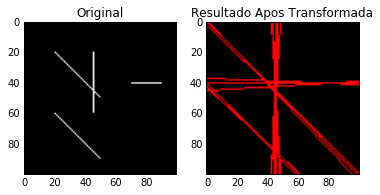

In [15]:
# Transformação das coordenadas polares do espaço de Hough para a cartesiana
cart_u = np.array(cart,'uint8') 
cart2 = cv2.cvtColor(cart_u,cv2.COLOR_GRAY2BGR)
rhos_i,thetas_i = np.nonzero(acc2)
rhos = rho[rhos_i]
thetas = theta[thetas_i]
a = np.cos(thetas)
b = np.sin(thetas)
x0 = a*rhos # cálculo do x0
y0 = b*rhos # cálculo do y0
for i in range(len(x0)):
    x1 = int(x0[i] + 200*(-b[i])) #
    y1 = int(y0[i] + 200*(a[i]))
    x2 = int(x0[i] - 200*(-b[i]))
    y2 = int(y0[i] - 200*(a[i]))
    cv2.line(cart2,(x1,y1),(x2,y2),(255,0,0),1) # OpenCV para facilitar o desenho das linhas
    
plt.subplot(1,2,1),plt.imshow(cart,cmap='gray'),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cart2,cmap='gray'),plt.title('Resultado Apos Transformada')      

## Exercíco 2 - Transformada de Hough para retas com OpenCV

A Transformada de Hough para retas do OpenCV pode ser calculada por meio de duas funções:
- Hough Lines
- Hough Lines Probabilistic

As principais diferenças entre elas são que a probabilistica você pode limitar o tamanho das retas a ser encontrado e seu resultado não são os pontos $\rho$ e $\theta$, mas sim os pontos $x_{1},y_{1},x_{2} e x_{2}$ das retas encontradas.

Comumente se utiliza a a função de Canny para a detecção de bordas, essa transformada já binariza a imagem. Entretanto, aproveitando os conhecimentos vistos em sala será utilizado a magnitude dos filtros de sobel seguido da limiarização da imagem.


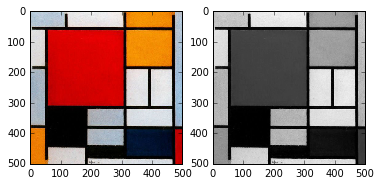

In [16]:
# Leitura e conversão manual da imagem para tons de cinza
img_color = mpimg.imread('./square_paint.jpg')  
img = 0.299*img_color[:,:,0]+0.587*img_color[:,:,1]+0.114*img_color[:,:,2]
plt.subplot(1,2,1)
plt.imshow(img_color,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img,cmap='gray')


In [17]:
# Definição da Função da Magnitude de Sobel
def MagSobel(src,mode=None):
    if mode == None:
        mode = 'same'
    Sv = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    Sh = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    fv = signal.convolve2d(src.astype(float),Sv,mode)
    fh = signal.convolve2d(src.astype(float),Sh,mode)
    return (fh**2 + fv**2)**0.5

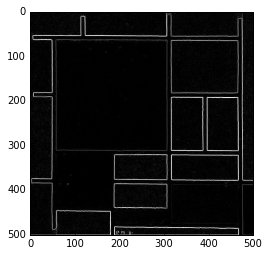

In [18]:
# Detecção de bordas com Magnitude de Sobel
bordas = MagSobel(img)
plt.imshow(bordas,cmap='gray')

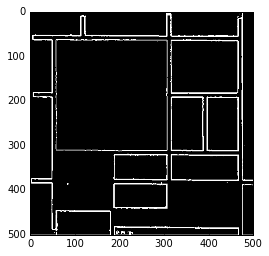

In [19]:
# Limiarização das bordas da magnitude de Sobel
bordas *= (255.0/bordas.max()) #normalização para valores entre 0-255
img_bw = np.array((bordas > 30)*255,'uint8') #limiarização e conversão para uint8 (Threshold = 30)
plt.imshow(img_bw,cmap='gray')

#### HoughLines()

```
lines = cv.HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[, min_theta[, max_theta]]]]])
```

- image : Imagem de entrada deve possui um único canal
- rho: resolução dos valores de $\rho$, comumente se utiliza 1
- theta: resolução dos valores de theta comumente se utiliza 1º, isto é, $np.pi / 180$
- threshold: limiar do número de votos no acumulador, caso seja maior que esse valor o ponto é considerado uma reta
- srn e stn são parametro de multi-scale, para a TH padrão será deixado o valor padrão srn=0 e stn=0
- min_theta: menor ângulo a ser verificado pela transformada
- max_theta: maior ângulo a ser verificado pela transformada

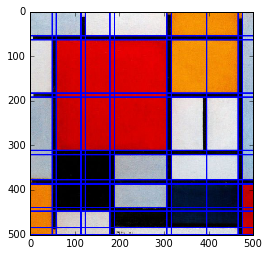

In [21]:
color = img_color.copy()
# resolução de rho = 1, resolução de theta = 90º
# Serão mostrados apenas retas com os ângulos 0º,90º, i.e., horizontais e verticais
# número mínimo de votos utilizado = 50
lines = cv2.HoughLines(img_bw,1,np.pi/2,50) 
# Transformação inversa de Hough
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho 
    y0 = b*rho 
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(color,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(color,cmap='gray')  

In [24]:
print lines

[[[ 0.0000000e+00  0.0000000e+00]]

 [[ 0.0000000e+00  1.5707964e+00]]

 [[ 4.7400000e+02  0.0000000e+00]]

 [[ 4.9900000e+02  0.0000000e+00]]

 [[ 5.0000000e+02  1.5707964e+00]]

 [[ 5.5000000e+01  1.5707964e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 4.9000000e+01  0.0000000e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[ 6.4000000e+01  1.5707964e+00]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 5.8000000e+01  0.0000000e+00]]

 [[ 3.7700000e+02  1.5707964e+00]]

 [[ 4.7800000e+02  1.5882496e+00]]

 [[ 4.8400000e+02  1.5707964e+00]]

 [[ 3.2100000e+02  1.5707964e+00]]

 [[ 3.7100000e+02  1.5882496e+00]]

 [[ 5.0000000e+01  1.5882496e+00]]

 [[ 6.0000000e+01  1.5882496e+00]]

 [[ 3.1600000e+02  1.5882496e+00]]

 [[-4.7000000e+02  3.1241393e+00]]

 [[-4.6000000e+02  3.1241393e+00]]

 [[-3.1200000e+02  3.1241393e+00]]

 [[ 1.8300000e+02  1.5707964e+00]]

 [[ 6.9000000e+01  1.5358897e+00]]

 [[ 1.9200000e+02  1.5707964e+00]]

 [[ 5.4000000e+01  1.7453292

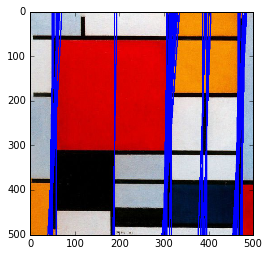

In [23]:
# Laço condicional para separa as retas cujo ângulo da normal está abaixo de trinta graus 
color = img_color.copy()
lines = cv2.HoughLines(img_bw,1,np.pi/180,100) 
for line in lines:
    rho,theta = line[0]
    if(theta < np.pi/6.0):
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(color,(x1,y1),(x2,y2),(0,0,255),2)
plt.imshow(color,cmap='gray')  

In [25]:
print lines

[[[ 0.0000000e+00  0.0000000e+00]]

 [[ 0.0000000e+00  1.5707964e+00]]

 [[ 4.7400000e+02  0.0000000e+00]]

 [[ 4.9900000e+02  0.0000000e+00]]

 [[ 5.0000000e+02  1.5707964e+00]]

 [[ 5.5000000e+01  1.5707964e+00]]

 [[ 3.0500000e+02  0.0000000e+00]]

 [[ 4.9000000e+01  0.0000000e+00]]

 [[ 3.1100000e+02  1.5707964e+00]]

 [[ 6.4000000e+01  1.5707964e+00]]

 [[ 4.6400000e+02  0.0000000e+00]]

 [[ 3.1500000e+02  0.0000000e+00]]

 [[ 5.8000000e+01  0.0000000e+00]]

 [[ 3.7700000e+02  1.5707964e+00]]

 [[ 4.7800000e+02  1.5882496e+00]]

 [[ 4.8400000e+02  1.5707964e+00]]

 [[ 3.2100000e+02  1.5707964e+00]]

 [[ 3.7100000e+02  1.5882496e+00]]

 [[ 5.0000000e+01  1.5882496e+00]]

 [[ 6.0000000e+01  1.5882496e+00]]

 [[ 3.1600000e+02  1.5882496e+00]]

 [[-4.7000000e+02  3.1241393e+00]]

 [[-4.6000000e+02  3.1241393e+00]]

 [[-3.1200000e+02  3.1241393e+00]]

 [[ 1.8300000e+02  1.5707964e+00]]

 [[ 6.9000000e+01  1.5358897e+00]]

 [[ 1.9200000e+02  1.5707964e+00]]

 [[ 5.4000000e+01  1.7453292

#### HoughLinesP() - Probabilistics

```
lines = cv.HoughLinesP(image,rho,theta,threshold[,lines[,minLineLength[,maxLineGap]]])
```

- image : Imagem de entrada deve possui um único canal
- rho: resolução dos valores de $\rho$, comumente se utiliza 1
- theta: resolução dos valores de theta comumente se utiliza 1º, isto é, $np.pi / 180$
- threshold: limiar do número de votos no acumulador, caso seja maior que esse valor o ponto é considerado uma reta
- lines: array de saída (opcional)
- minLineLength: tamanho mínimo da linha a ser desenhada
- maxLineGap: maior distancia entre dois pontos no qual se possa considerar uma linha

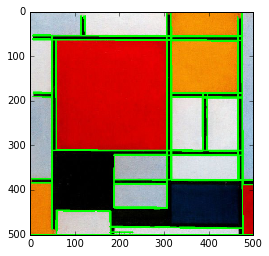

In [26]:
color = img_color.copy()
lines = cv2.HoughLinesP(img_bw,1,np.pi/180,30,minLineLength=20,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(color,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(color,cmap='gray')  

In [27]:
print lines

[[[  0 500   0   0]]

 [[474 500 474   0]]

 [[  1 500 499 500]]

 [[  1   0 499   0]]

 [[ 48 311 475 311]]

 [[305 441 305   1]]

 [[  5  55 473  55]]

 [[190  65 473  65]]

 [[ 48 486  48  54]]

 [[499 499 499   1]]

 [[473 398 473   1]]

 [[314 376 314   5]]

 [[463 379 463  12]]

 [[154  56 472  56]]

 [[464 379 464  16]]

 [[  6  64 394  64]]

 [[  5  54 287  54]]

 [[136 312 475 312]]

 [[465 379 465 192]]

 [[178 481 475 486]]

 [[ 49 488  49  63]]

 [[188 377 498 377]]

 [[ 58 310  58  63]]

 [[ 50 356  50  56]]

 [[306 441 306  66]]

 [[315 378 315  66]]

 [[472 160 472   4]]

 [[316 321 462 321]]

 [[316  66 316  35]]

 [[178 482 427 486]]

 [[186 322 475 322]]

 [[316 182 472 182]]

 [[  6 183  47 183]]

 [[187 376 358 376]]

 [[ 59  63 236  63]]

 [[475 388 475 267]]

 [[ 57 194  57  65]]

 [[187 385 281 385]]

 [[316 192 472 192]]

 [[316 378 316 121]]

 [[186 387 226 387]]

 [[ 58 446 143 448]]

 [[272 378 304 378]]

 [[317  66 462  66]]

 [[187 440 304 440]]

 [[186 439

## Exercíco 3 - Transformada de Hough para circunferências com OpenCV

A Transformada de Hough para retas do OpenCV pode ser calculada por meio da função HoughCircles():

```
circles cv2.HoughCircles( InputArray image, int method, double dp, double minDist, double param1=100, 
                          double param2=100,int minRadius=0, int maxRadius=0 ) 	
```

- image : Imagem de entrada deve possui um único canal
- method: método de detecção, normalmente HOUGH_GRADIENT
- dp: inverso da razão entre resolução do acumulador e resolução da imagem.
- minDist: Menor distancia entre os centro de dois círculos
- param1: Primeiro parâmetro do método indicado em method, no caso do HOUGH_GRADIENT costuma-se usar o maior threshold passado no filtro de Canny (Filtro normalmente utilizado antes da TH)
- param2: Segundo parâmetro do método, no caso do HOUGH_GRADIENT é o limiar do número de votos do acumulador
- minRadius: Menor raio a ser verificado
- maxRadius: Maior raio a ser verificado


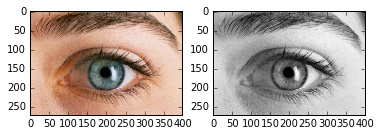

In [28]:
img_color = mpimg.imread('./eye.jpg')  
img = 0.299*img_color[:,:,0]+0.587*img_color[:,:,1]+0.114*img_color[:,:,2]
plt.subplot(1,2,1)
plt.imshow(img_color,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img,cmap='gray')

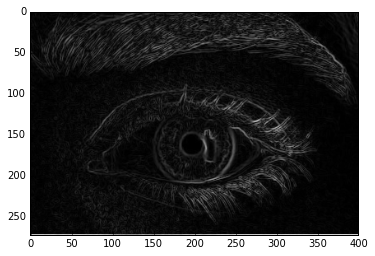

In [29]:
bordas = MagSobel(img)
plt.imshow(bordas,cmap='gray')

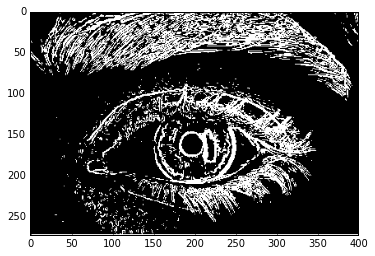

In [30]:
bordas *= (255.0/bordas.max())
img_bw = np.array((bordas > 25)*255,'uint8')
plt.imshow(img_bw,cmap='gray')

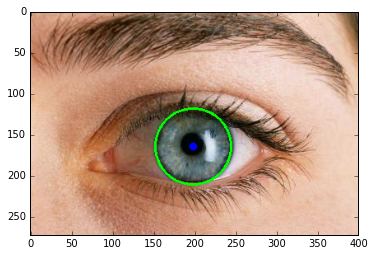

In [31]:
cimg = img_color.copy()
circles = cv2.HoughCircles(img_bw,cv2.HOUGH_GRADIENT,1,8,param1=10,param2=50,minRadius=5,maxRadius=60)   
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),6)
plt.imshow(cimg,cmap='gray')
cimg = []